In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [4]:
x_train=x_train/255
x_test=x_test/255

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Reshape

In [8]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [9]:
decoder=Sequential()
decoder.add(Dense(50,activation='relu',input_shape=[25]))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='relu'))
decoder.add(Reshape([28,28]))


In [10]:
autoencoder=Sequential([encoder,decoder])

In [11]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
autoencoder.fit(x_train,x_train,validation_data=[x_test,x_test],epochs=10)

Epoch 1/10


2023-04-14 20:17:51.710569: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 17s 9ms/step - loss: 0.4148 - accuracy: 0.2764 - val_loss: 0.3733 - val_accuracy: 0.2583
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3406 - accuracy: 0.3176 - val_loss: 0.3467 - val_accuracy: 0.2855
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3235 - accuracy: 0.3383 - val_loss: 0.3211 - val_accuracy: 0.3477
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3110 - accuracy: 0.3582 - val_loss: 0.3054 - val_accuracy: 0.3689
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3325 - accuracy: 0.3127 - val_loss: 0.3173 - val_accuracy: 0.3378
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3263 - accuracy: 0.3200 - val_loss: 0.3179 - val_accuracy: 0.3354
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3234 - accuracy: 0.3262 - val_loss: 0.3178 - val_accuracy: 0.3

In [13]:
loss=pd.DataFrame(autoencoder.history.history)

<Axes: >

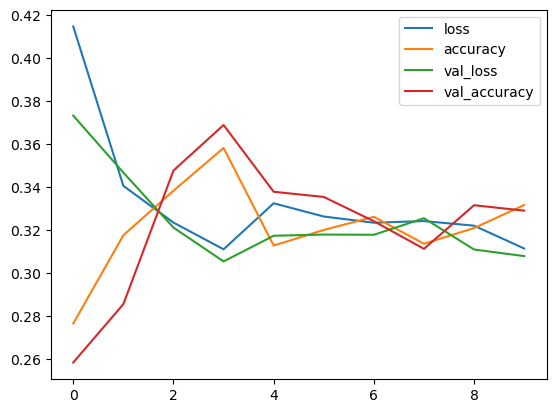

In [14]:
loss.plot()

In [15]:
pred=autoencoder.predict(x_test[:10])

1/1 [==============================] - 0s 218ms/step


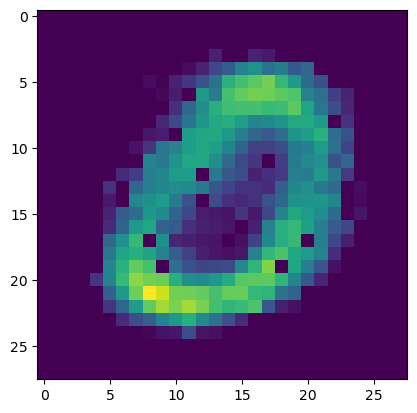

In [18]:
plt.imshow(pred[3])

In [19]:
from tensorflow.keras.layers import GaussianNoise

In [20]:
sample=GaussianNoise(0.2)

In [21]:
noisey=sample(x_test[:2],training=True)

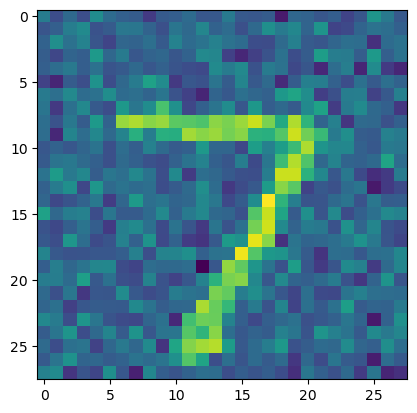

In [22]:
plt.imshow(noisey[0])

## Building Noise Remover

In [23]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [24]:
decoder=Sequential()
decoder.add(Dense(50,activation='relu',input_shape=[25]))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='relu'))
decoder.add(Reshape([28,28]))


In [27]:
noise_remover=Sequential([encoder,decoder])

In [28]:
noise_remover.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
noise_remover.fit(x_train,x_train,validation_data=(x_test,x_test),epochs=8)

Epoch 1/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4342 - accuracy: 0.2985 - val_loss: 0.3960 - val_accuracy: 0.2651
Epoch 2/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3608 - accuracy: 0.3173 - val_loss: 0.3308 - val_accuracy: 0.3366
Epoch 3/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3441 - accuracy: 0.2997 - val_loss: 0.3491 - val_accuracy: 0.2859
Epoch 4/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3353 - accuracy: 0.3082 - val_loss: 0.3253 - val_accuracy: 0.3385
Epoch 5/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3208 - accuracy: 0.3407 - val_loss: 0.3042 - val_accuracy: 0.3728
Epoch 6/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3225 - accuracy: 0.3340 - val_loss: 0.3173 - val_accuracy: 0.3349
Epoch 7/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3170 - accuracy: 0.3480 - val_loss: 0.3165 - val_accuracy:

In [30]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

Original


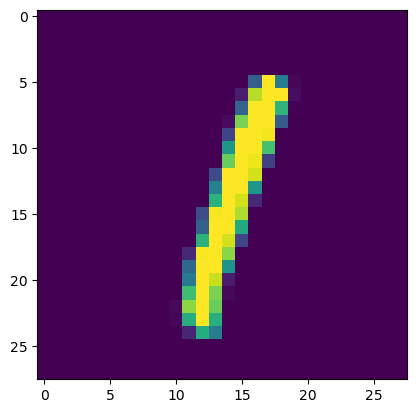

Noisey


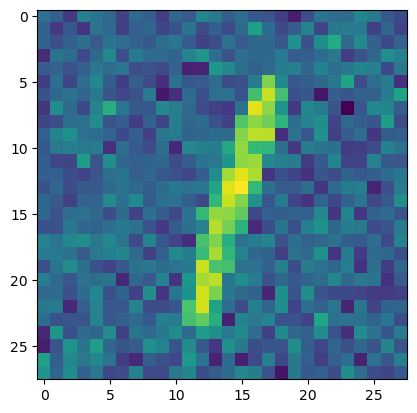

denoiser


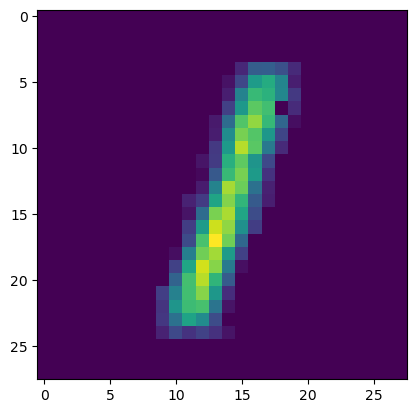

In [36]:
n = 5
print("Original")
plt.imshow(x_test[n])
plt.show()
print("Noisey")
plt.imshow(ten_noisey_images[n])
plt.show()
print("denoiser")
plt.imshow(denoised[n])
plt.show()